<a href="https://colab.research.google.com/github/fsclsnow/AML/blob/master/Project7_RNN_Team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7 - Team 2
Joe, Getong, Abby

# Setup

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# Download the data
import urllib
import os

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/fsclsnow/AML/master/"
AP_PATH = os.path.join("Data")
AP_URL = DOWNLOAD_ROOT + "Data/AAPL_2015-2020.csv"

In [0]:
import pandas as pd

def load_ap_data(ap_path=AP_PATH):
    csv_path = os.path.join(DOWNLOAD_ROOT, ap_path, "AAPL_2015-2020.csv")
    return pd.read_csv(csv_path)

In [4]:
ap5 = load_ap_data()
real_price = ap5.filter(['Open'])
ap5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-27,132.309998,133.130005,131.149994,132.649994,122.072395,96954200
1,2015-04-28,134.460007,134.539993,129.570007,130.559998,120.149078,118924000
2,2015-04-29,130.160004,131.589996,128.300003,128.639999,118.382187,63386100
3,2015-04-30,128.639999,128.639999,124.580002,125.150002,115.170479,83195400
4,2015-05-01,126.099998,130.130005,125.300003,128.949997,118.667458,58512600


In [5]:
print("checking if any null values are present\n", ap5.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
ap5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


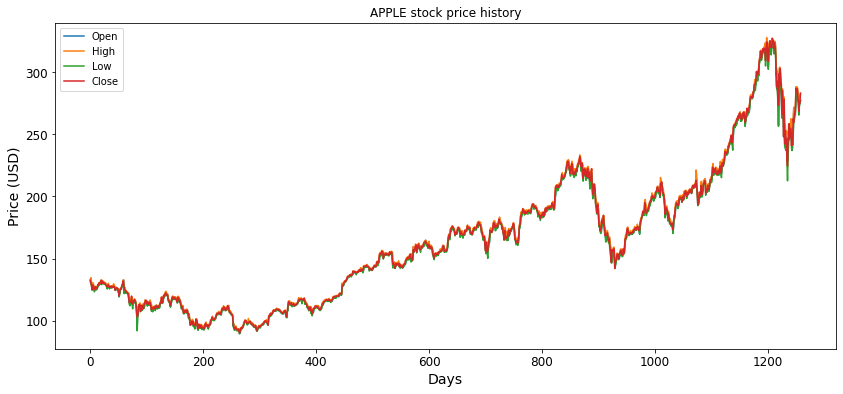

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(ap5["Open"])
plt.plot(ap5["High"])
plt.plot(ap5["Low"])
plt.plot(ap5["Close"])
plt.title('APPLE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

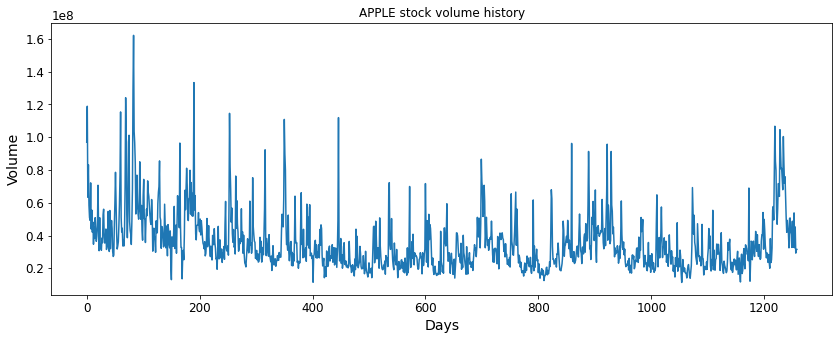

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(ap5["Volume"])
plt.title('APPLE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(ap5.iloc[:,1:2])

In [10]:
training_set_scaled.shape

(1259, 1)

In [0]:
X_train = []
Y_train = []
previous = 60
for i in range(previous,len(training_set_scaled)):
  X_train.append(training_set_scaled[i-previous:i,0])
  Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train)[:], np.array(Y_train)[:]
x_train, y_train = np.array(X_train)[:len(X_train)-365], np.array(Y_train)[:len(Y_train)-365]
x_valid, y_valid = np.array(X_train)[len(X_train)-365-previous:len(X_train)-60], np.array(Y_train)[len(Y_train)-365-previous:len(Y_train)-60]
# x_test, y_test = np.array(X_train)[len(X_train)-60-previous:], np.array(Y_train)[len(Y_train)-60-previous:]

x_1m, y_1m = np.array(X_train)[len(X_train)-365-previous:len(X_train)-335], np.array(Y_train)[len(Y_train)-365-previous:len(Y_train)-335]
x_4m, y_4m = np.array(X_train)[len(X_train)-365-previous:len(X_train)-245], np.array(Y_train)[len(Y_train)-365-previous:len(Y_train)-245]

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_valid = np.reshape(x_valid, (x_valid.shape[0],x_valid.shape[1],1))
# x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_1m = np.reshape(x_1m, (x_1m.shape[0],x_1m.shape[1],1))
x_4m = np.reshape(x_4m, (x_4m.shape[0],x_4m.shape[1],1))


Training Set     previous 4 years

Validation Set   last year without last 60 days (10 months after the training set)

Test Set         last 60days

x_1m             1 month after training set (30days)

x_4m             4 month after training set (120 days)

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout

Using TensorFlow backend.


Initialising the RNN

Building the LSTM layers and some Dropout regularization

In [0]:
modelLSTM = Sequential()

In [0]:
# Adding the first LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1],1)))
modelLSTM.add(Dropout(0.2))

In [0]:
# Adding a second LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 50, return_sequences= True))
modelLSTM.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 50, return_sequences= True))
modelLSTM.add(Dropout(0.2))

In [0]:
# Adding a fouth LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 50))
modelLSTM.add(Dropout(0.2))

In [0]:
# Adding the output layer
modelLSTM.add(Dense(units = 1))

In [0]:
# Compiling the RNN
modelLSTM.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Fitting the RNN to the Training set
history = modelLSTM.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_data=(x_valid, y_valid))

Train on 1199 samples, validate on 365 samples
Epoch 1/50
1199/1199 [==============================] - 8s 6ms/step - loss: 0.0241 - val_loss: 0.0051
Epoch 2/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0061 - val_loss: 0.0040
Epoch 3/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 4/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0042 - val_loss: 0.0074
Epoch 5/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 6/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 7/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 8/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 9/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 10/50
1199/1199 [============

In [21]:
modelLSTM.evaluate(X_train, Y_train)

1199/1199 [==============================] - 1s 932us/step


0.0006592854254687201

In [0]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 50, 0, 0.01])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

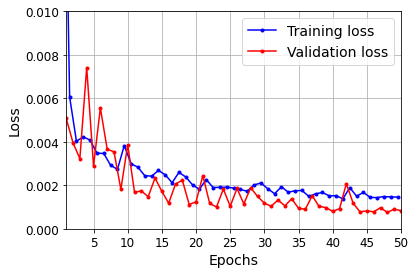

In [23]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

Building the GRU layers and some Dropout regularization

In [0]:
# The GRU architecture
modelGRU = Sequential()
# First GRU layer with Dropout regularisation
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
modelGRU.add(Dropout(0.2))
# Second GRU layer
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(Dropout(0.2))
# Third GRU layer
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(Dropout(0.2))
# Fourth GRU layer
modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))
# The output layer
modelGRU.add(Dense(units=1))

# Compiling the RNN
modelGRU.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])


In [25]:
# Fitting to the training set
history2 = modelGRU.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_data=(x_valid, y_valid))

Train on 1199 samples, validate on 365 samples
Epoch 1/50
1199/1199 [==============================] - 9s 8ms/step - loss: 0.0258 - accuracy: 0.0017 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 2/50
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0038 - accuracy: 0.0017 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 3/50
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0029 - accuracy: 0.0017 - val_loss: 9.4803e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0028 - accuracy: 0.0017 - val_loss: 9.6177e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0028 - accuracy: 0.0017 - val_loss: 9.6572e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0023 - accuracy: 0.0017 - val_loss: 8.8626e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
1199/1199 [===========================

In [26]:
modelGRU.evaluate(X_train, Y_train)

1199/1199 [==============================] - 1s 890us/step


[0.00035806603699043284, 0.0016680567059665918]

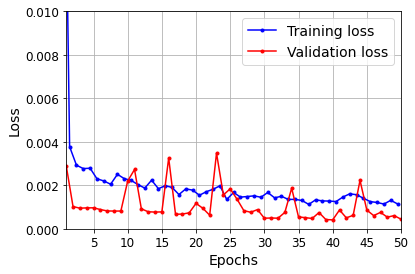

In [27]:
plot_learning_curves(history2.history["loss"], history2.history["val_loss"])
plt.show()

# Using LSTM model to predict

In [0]:
# Getting the real stock price
dataset_test = load_ap_data()
dataset_test = dataset_test[:len(dataset_test)]
real_stock_price = dataset_test.iloc[previous:len(dataset_test),1:2].values

In [0]:
dataset_total = pd.concat((ap5['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - previous:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range (previous,len(dataset_test)):
  x_test.append(inputs[i-previous:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price_LSTM = modelLSTM.predict(x_test)
predicted_stock_price_LSTM = sc.inverse_transform(predicted_stock_price_LSTM)

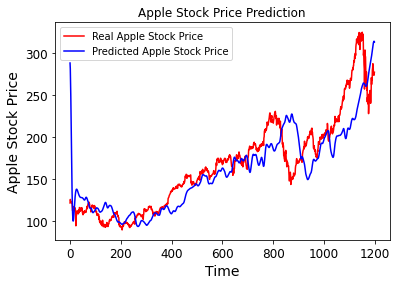

In [31]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price_LSTM, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [33]:
# Get the root mean squared error (RMSE)
rmse_LSTM = np.sqrt(np.mean(((predicted_stock_price_LSTM - real_stock_price) ** 2)))
rmse_LSTM

28.763286575169168

# Using GRU model to predict

In [0]:
dataset_total = pd.concat((ap5['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - previous:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range (previous,len(dataset_test)):
  x_test.append(inputs[i-previous:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price_GRU = modelGRU.predict(x_test)
predicted_stock_price_GRU = sc.inverse_transform(predicted_stock_price_GRU)

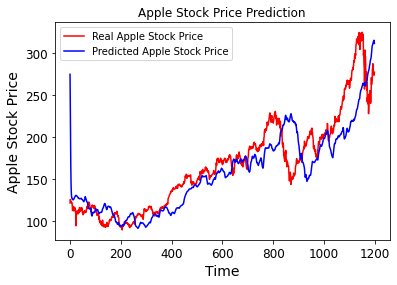

In [36]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price_GRU, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [38]:
# Get the root mean squared error (RMSE)
rmse_GRU = np.sqrt(np.mean(((predicted_stock_price_GRU - real_stock_price) ** 2)))
rmse_GRU

27.76601466773277

# Forecasting 30 steps ahead (One Month)

In [0]:
n_steps = 30
dataset_test = load_ap_data()
dataset_1m = dataset_test[len(dataset_test)-365-previous:len(dataset_test)-365 + n_steps]
real_stock_price_1m = dataset_1m.iloc[:,1:2].values

real_price_1m = real_price[len(dataset_test)-365-previous:len(dataset_test)-365 + n_steps]
train_1m = real_price_1m[:previous]
valid_1m = real_price_1m[previous:]


In [0]:
dataset_to = pd.concat((ap5['Open'], dataset_1m['Open']), axis = 0)
inputs = dataset_to[len(dataset_to) - len(dataset_1m) - previous:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range (previous,len(dataset_1m)):
  x_test.append(inputs[i-previous:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price_1m = modelLSTM.predict(x_test)
predicted_stock_price_1m = sc.inverse_transform(predicted_stock_price_1m)

In [41]:
# Get the root mean squared error (RMSE)
valid_value = valid_1m.values
rmse = np.sqrt(np.mean(((predicted_stock_price_1m - valid_value) ** 2)))
rmse

53.836403561480125

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


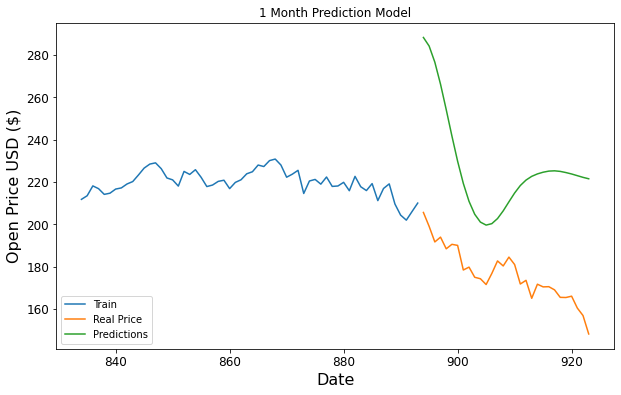

In [47]:
valid_1m['Predictions'] = predicted_stock_price_1m
# Visualize the data
plt.figure(figsize=(10,6))
plt.title('1 Month Prediction Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Open Price USD ($)', fontsize=16)
plt.plot(train_1m['Open'])
plt.plot(valid_1m[['Open', 'Predictions']])
plt.legend(['Train', 'Real Price', 'Predictions'], loc='lower left')
plt.show()

# Forecasting 120 steps ahead (Four Month)

In [0]:
n_steps = 120
dataset_test = load_ap_data()
dataset_4m = dataset_test[len(dataset_test)-365-previous:len(dataset_test)-365 + n_steps]
real_stock_price_4m = dataset_1m.iloc[:,1:2].values

real_price_4m = real_price[len(dataset_test)-365-previous:len(dataset_test)-365 + n_steps]
train_4m = real_price_4m[:previous]
valid_4m = real_price_4m[previous:]

In [0]:
dataset_to = pd.concat((ap5['Open'], dataset_4m['Open']), axis = 0)
inputs = dataset_to[len(dataset_to) - len(dataset_4m) - previous:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range (previous,len(dataset_4m)):
  x_test.append(inputs[i-previous:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price_4m = modelLSTM.predict(x_test)
predicted_stock_price_4m = sc.inverse_transform(predicted_stock_price_4m)

In [45]:
# Get the root mean squared error (RMSE)
valid_value = valid_4m.values
rmse = np.sqrt(np.mean(((predicted_stock_price_4m - valid_value) ** 2)))
rmse

48.83156053826269

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


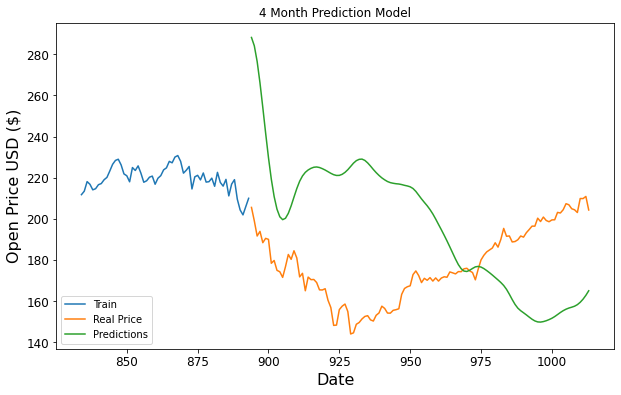

In [48]:
valid_4m['Predictions'] = predicted_stock_price_4m
# Visualize the data
plt.figure(figsize=(10,6))
plt.title('4 Month Prediction Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Open Price USD ($)', fontsize=16)
plt.plot(train_4m['Open'])
plt.plot(valid_4m[['Open', 'Predictions']])
plt.legend(['Train', 'Real Price', 'Predictions'], loc='lower left')
plt.show()

# Forecasting 335 steps ahead (Ten Month)

In [0]:
n_steps = 335
dataset_test = load_ap_data()
dataset_10m = dataset_test[len(dataset_test)-365-previous:len(dataset_test)-365 + n_steps]
real_stock_price_10m = dataset_1m.iloc[:,1:2].values

real_price_10m = real_price[len(dataset_test)-365-previous:len(dataset_test)-365 + n_steps]
train_10m = real_price_10m[:previous]
valid_10m = real_price_10m[previous:]

In [0]:
dataset_to = pd.concat((ap5['Open'], dataset_10m['Open']), axis = 0)
inputs = dataset_to[len(dataset_to) - len(dataset_10m) - previous:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range (previous,len(dataset_10m)):
  x_test.append(inputs[i-previous:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price_10m = modelLSTM.predict(x_test)
predicted_stock_price_10m = sc.inverse_transform(predicted_stock_price_10m)

In [51]:
# Get the root mean squared error (RMSE)
valid_value = valid_10m.values
rmse = np.sqrt(np.mean(((predicted_stock_price_10m - valid_value) ** 2)))
rmse

44.62807797902063

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


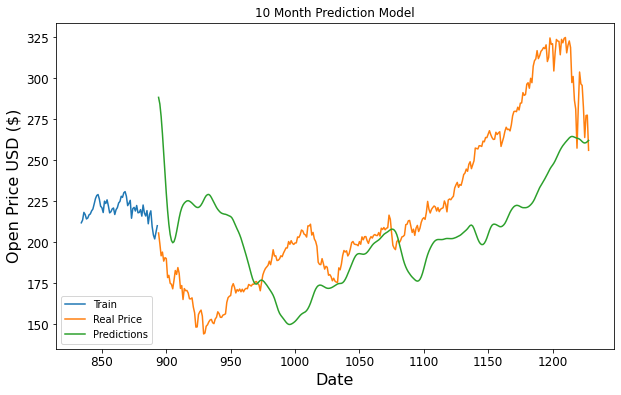

In [52]:
valid_10m['Predictions'] = predicted_stock_price_10m
# Visualize the data
plt.figure(figsize=(10,6))
plt.title('10 Month Prediction Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Open Price USD ($)', fontsize=16)
plt.plot(train_10m['Open'])
plt.plot(valid_10m[['Open', 'Predictions']])
plt.legend(['Train', 'Real Price', 'Predictions'], loc='lower left')
plt.show()

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# fix random seed for reproducibility
seed = 32
np.random.seed(seed)
# load dataset
# dataset = np.array(load_ap_data())
# split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=modelGRU, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# References:
https://towardsdatascience.com/predicting-stock-price-with-lstm-13af86a74944

https://stackoverflow.com/questions/52778922/stock-prediction-gru-model-predicting-same-given-values-instead-of-future-stoc

https://www.kaggle.com/charel/learn-by-example-rnn-lstm-gru-time-series